# Manifold Alignment via Stochastic Hoppoing (MASH) Demonstration

This demonstrates how to use the MASH class. Note, not everything discussed in the paper will be shown here. 

### Necessary dependencies for MASH:
- graphtools
- numpy
- matplotlib.pyplot
- igraph
- sklearn

### Additional dependicies for MASH:
- time
- seaborn

In [1]:
from SPUD_and_MASH import MASH

#We will require pandas for this demonstration
import pandas as pd
import numpy as np
from demonstration_helper import *

## Iris Dataset

In [11]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("/yunity/arusty/Graph-Manifold-Alignment/SPUD_and_MASH/csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[-10:] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_mashed = MASH(knn = 8, verbose = 3)

#Fit SPUD
iris_mashed.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

Time Data Below
 Time it took to execute the graph for domain A:  0.09826
 Time it took to compute kernal A:  0.00034
 Time it took to execute the graph for domain B:  0.08867
 Time it took to compute kernal B:  0.00029


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 9 and 34, 9 and 37, 34 and 37, 101 and 142. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


 Time it took to compute merge_graphs function:  0.04174
 Time it took to compute similarity_matrix function:  0.00075
Using optimal t value of 14
 Time it took to compute diffusion process:  0.0453
Fit process finished. We recommend calling optimize_by_creating_connections.


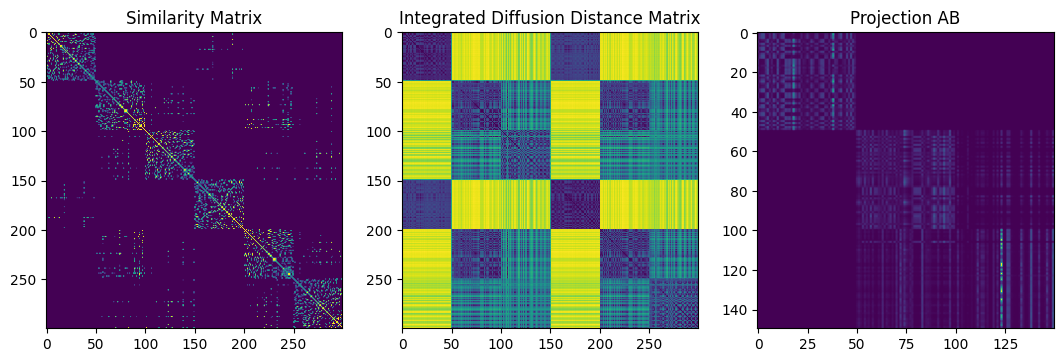

In [12]:
iris_mashed.plot_heat_maps()

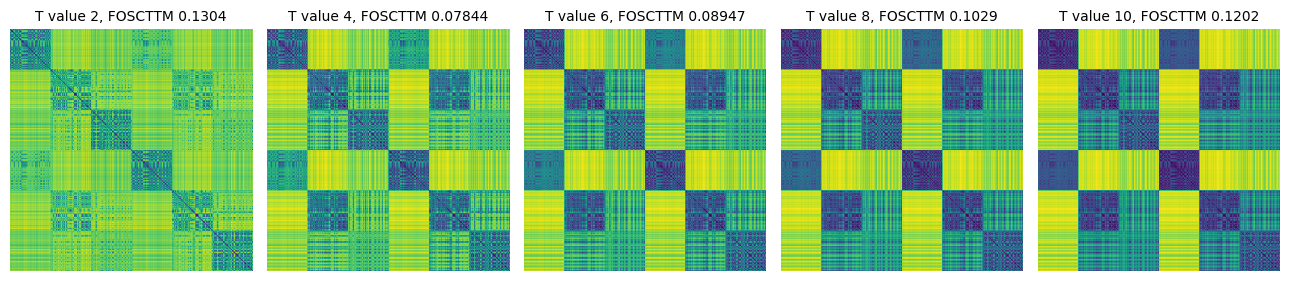

In [13]:
iris_mashed.plot_t_grid(rate = 2) #This function helps you find an ideal t value to use. 

Cross Embedding: 0.9466666666666667
FOSCTTM: 0.13488888888888886


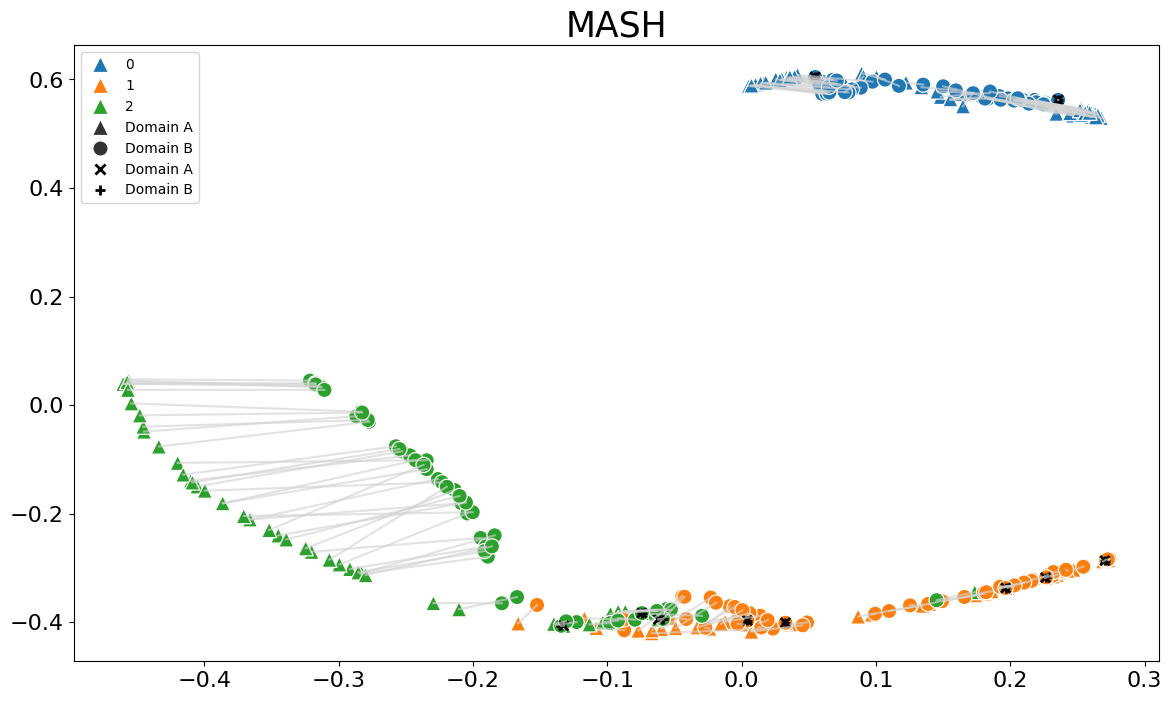

In [14]:
iris_mashed.plot_emb(labels = iris_labels)

## Seeds Dataset


In [16]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("/yunity/arusty/Graph-Manifold-Alignment/SPUD_and_MASH/csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
seeds_mashed = MASH(knn = 5, verbose = 0, IDC = 1, distance_measure_A = "euclidean", distance_measure_B = "euclidean") #NOTE: these are the default values. Try changing them!

#Fit SPUD
seeds_mashed.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors)

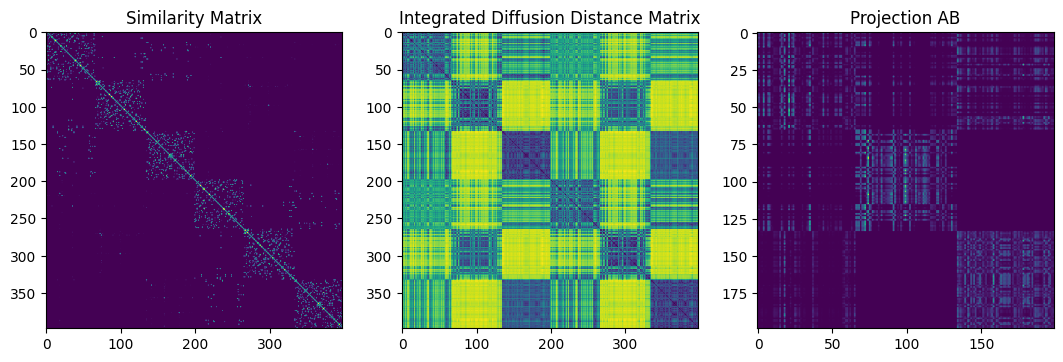

In [17]:
seeds_mashed.plot_heat_maps()

Cross Embedding: 0.8894472361809045
FOSCTTM: 0.112396151612333


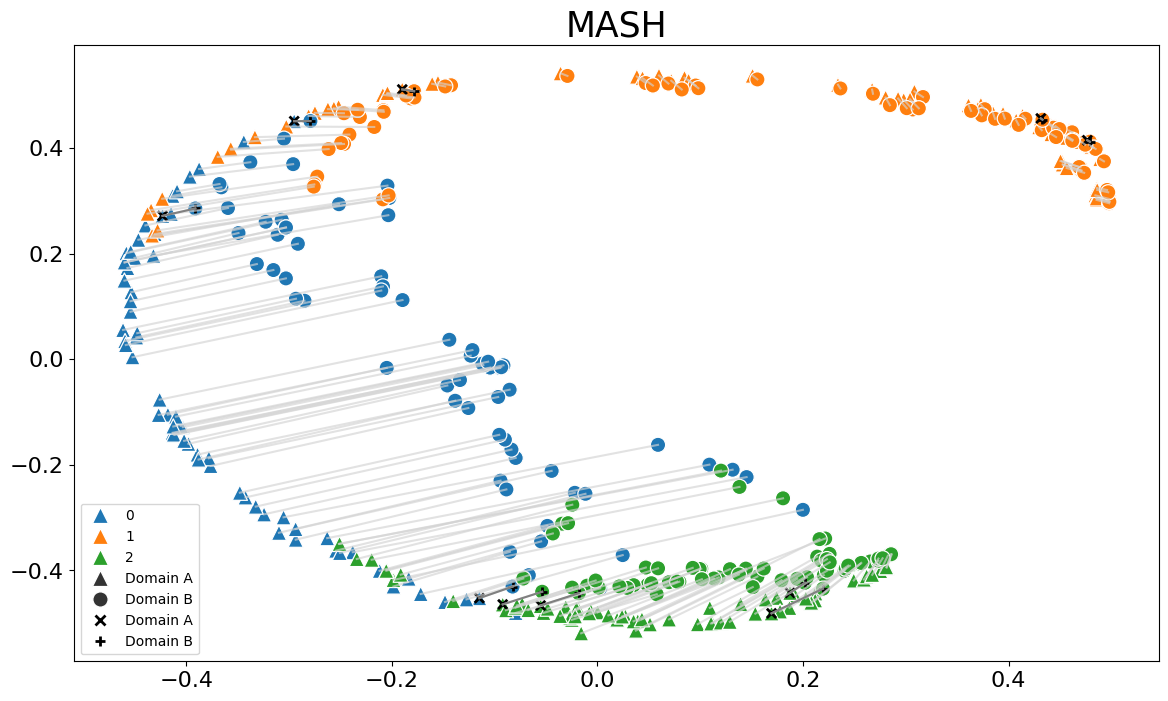

In [18]:
seeds_mashed.plot_emb(labels = seeds_labels) # We can see here in the center the domains seem to split apart in the blue area, because there are no anchors represented there.